In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
credit_card = pd.read_csv("cc.csv")
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
def clean_data(credit_card):
    credit_card = credit_card.dropna(subset=['CREDIT_LIMIT'])
    credit_card = credit_card.fillna({'MINIMUM_PAYMENTS': credit_card['MINIMUM_PAYMENTS'].mean()})
    credit_card = credit_card.drop(columns=['CUST_ID'])
    return credit_card

credit_card_clean = clean_data(credit_card.copy())
credit_card_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Original dataset size: 8950 samples
Dataset size after outlier removal: 8502 samples
Number of outliers detected: 448 samples


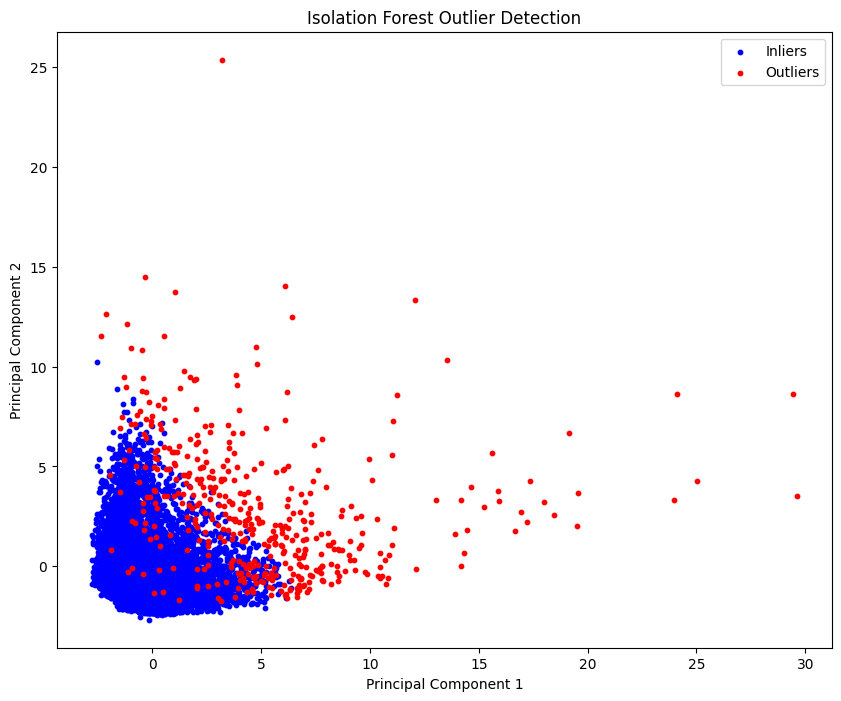

In [170]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


# Drop 'CUST_ID' column if present
if 'CUST_ID' in credit_card.columns:
    credit_card = credit_card.drop('CUST_ID', axis=1)

# Handle missing values by filling them with the column mean
credit_card.fillna(credit_card.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(credit_card)

# Apply Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(data_scaled)

# Separate inliers and outliers
data_no_outliers = credit_card[outlier_labels == 1]
data_outliers = credit_card[outlier_labels == -1]

# Summary of results
print(f"Original dataset size: {credit_card.shape[0]} samples")
print(f"Dataset size after outlier removal: {data_no_outliers.shape[0]} samples")
print(f"Number of outliers detected: {data_outliers.shape[0]} samples")

# Optional: Visualize results with PCA (2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(data_pca[outlier_labels == 1, 0], data_pca[outlier_labels == 1, 1], c='blue', label='Inliers', s=10)
plt.scatter(data_pca[outlier_labels == -1, 0], data_pca[outlier_labels == -1, 1], c='red', label='Outliers', s=10)
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [4]:
scaling=StandardScaler()
 
scaling.fit(credit_card_clean)

Scaled_data = normalize(scaling.transform(credit_card_clean))

# iso_forest = IsolationForest(contamination=0.05, random_state=42)
# outlier_labels = iso_forest.fit_predict(Scaled_data)
# data_no_outliers = Scaled_data[outlier_labels == 1]

principal=PCA(n_components=2, random_state=42)
X = principal.fit_transform(Scaled_data)


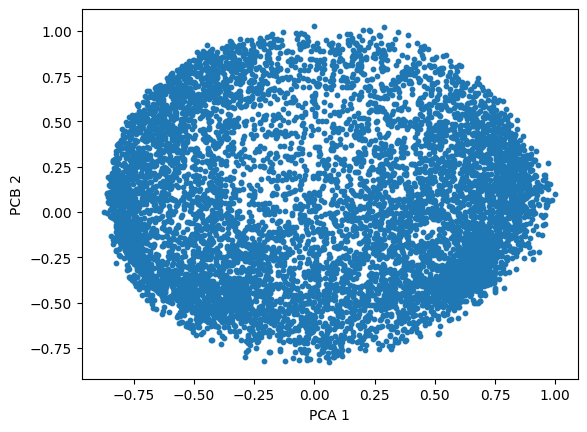

In [186]:
plt.scatter(X[:, 0], X[:, 1], s=10)
#plt.scatter(X[outlier_labels == 1, 0], X[outlier_labels == 1, 1], c='blue', label='Inliers', s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCB 2')
plt.show()

In [173]:
principal.explained_variance_ratio_.cumsum()

array([0.29041679, 0.4743267 ])

In [5]:
def elbow(model, X, max_range, **kwargs):
    cluster_range = range(2, max_range + 1)
    silhouette_scores = []

    for n_clusters in cluster_range:
        clustering = model(n_clusters=n_clusters, **kwargs)
        labels = clustering.fit_predict(X)
        score = silhouette_score(X, labels, random_state=42)
        silhouette_scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.show()

In [6]:
def interia(X, max_range, random_state=42):
    cluster_range = range(2, max_range + 1)
    Inertia = []

    for n_clusters in cluster_range:
        clustering = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20, random_state=random_state)
        clustering.fit_predict(X)
        Inertia.append(clustering.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, Inertia, marker='o')
    plt.title('Inertia vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.show() 

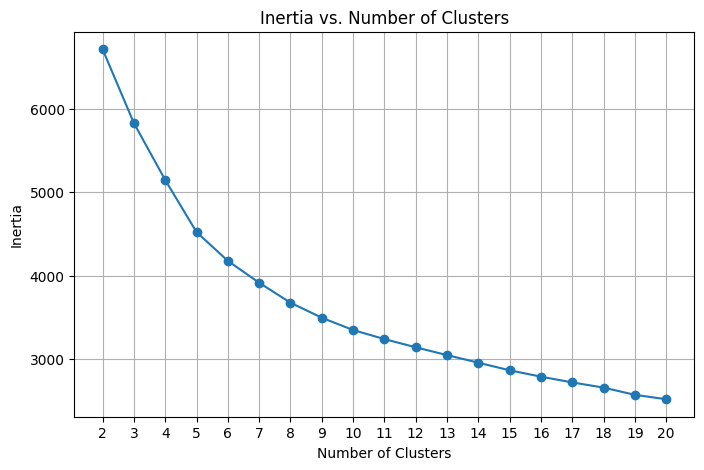

In [7]:
interia(Scaled_data, 20, random_state=42)

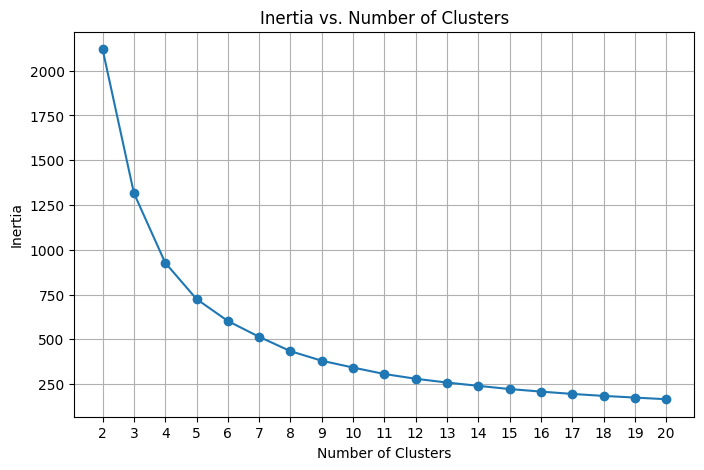

In [176]:
interia(X, 20, random_state=42)

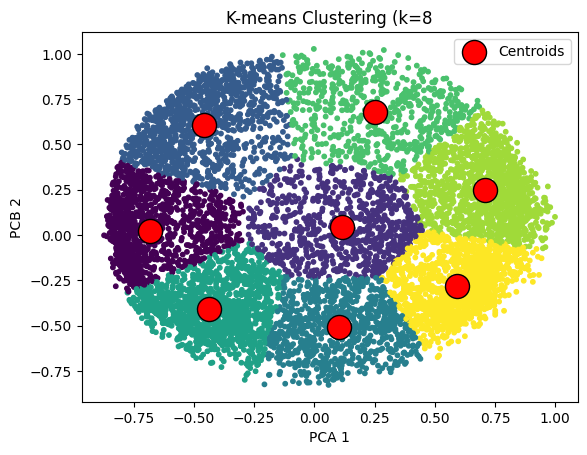

In [185]:
n_clusters = 8

kmeans = KMeans(n_init=20, init="k-means++", n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)
# Plot the clustered data points
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids', edgecolor='k')
plt.title(f'K-means Clustering (k={n_clusters}')
plt.xlabel('PCA 1')
plt.ylabel('PCB 2')
plt.legend()
plt.show()

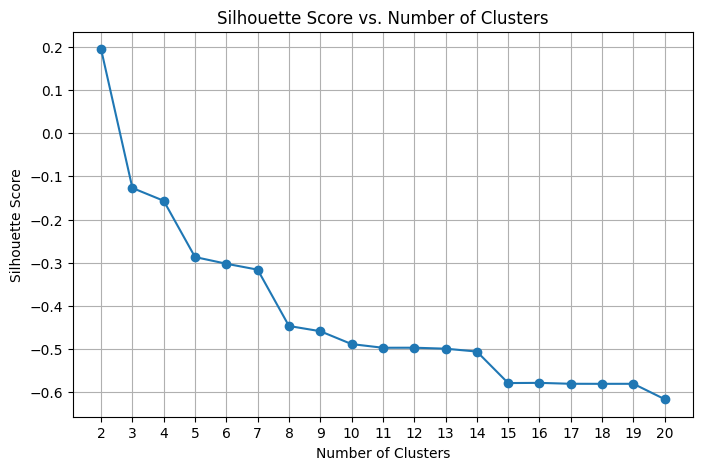

In [178]:
elbow(AgglomerativeClustering, X, 20, linkage="single")

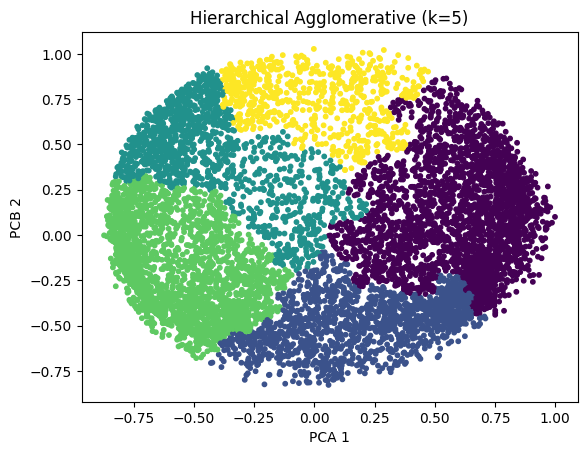

In [184]:
n_clusters = 5

hier = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
y_hier = hier.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_hier, cmap='viridis', s=10)
plt.title(f'Hierarchical Agglomerative (k={n_clusters})')
plt.xlabel('PCA 1')
plt.ylabel('PCB 2')
plt.show()

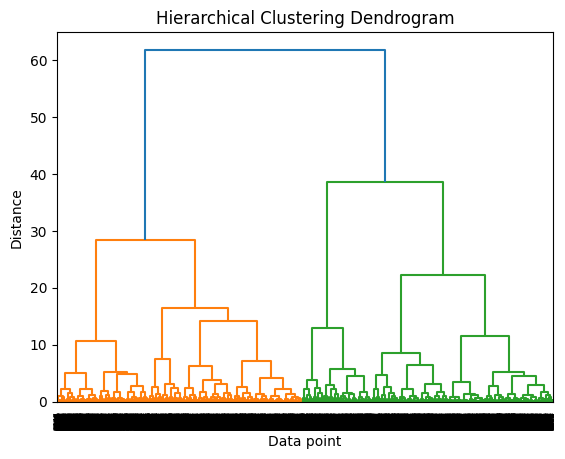

In [180]:

dendrogram(linkage(X, 'ward') ) 

plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Data point') 
plt.ylabel('Distance') 
plt.show()


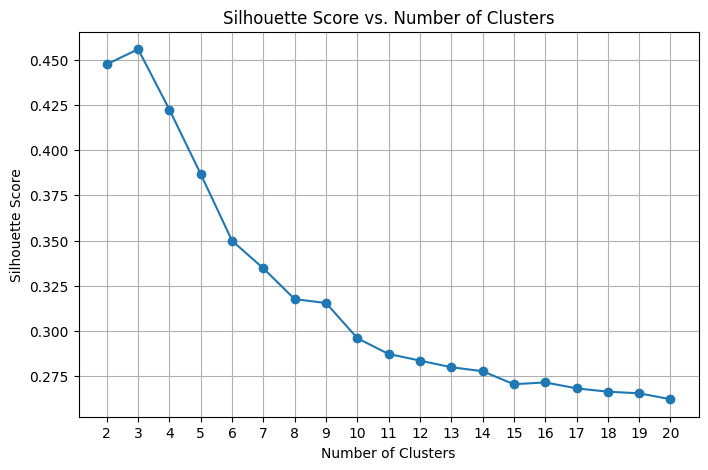

In [181]:
elbow(SpectralClustering, X, 20, random_state=42, affinity='rbf', n_init=20)

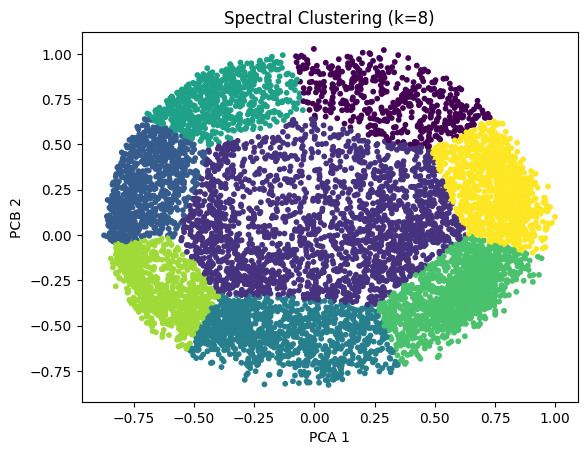

In [182]:
n_clusters = 8

spectral_model_rbf = SpectralClustering(n_clusters=n_clusters, affinity ='rbf', random_state=42) 
labels_rbf = spectral_model_rbf.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels_rbf, cmap='viridis', s=10)
plt.title(f'Spectral Clustering (k={n_clusters})')
plt.xlabel('PCA 1')
plt.ylabel('PCB 2')
plt.show()

In [191]:
import seaborn as sns

In [193]:
clusters=pd.concat([credit_card_clean, pd.DataFrame({'cluster':y_kmeans})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,4.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.304943,0.000000,12.0,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,4.0


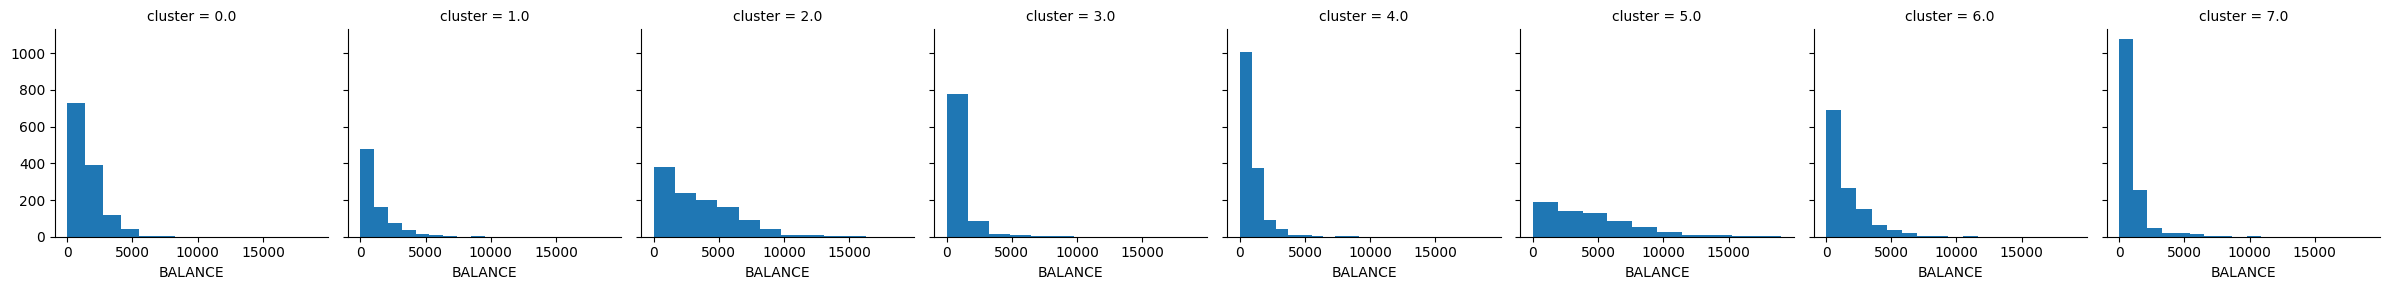

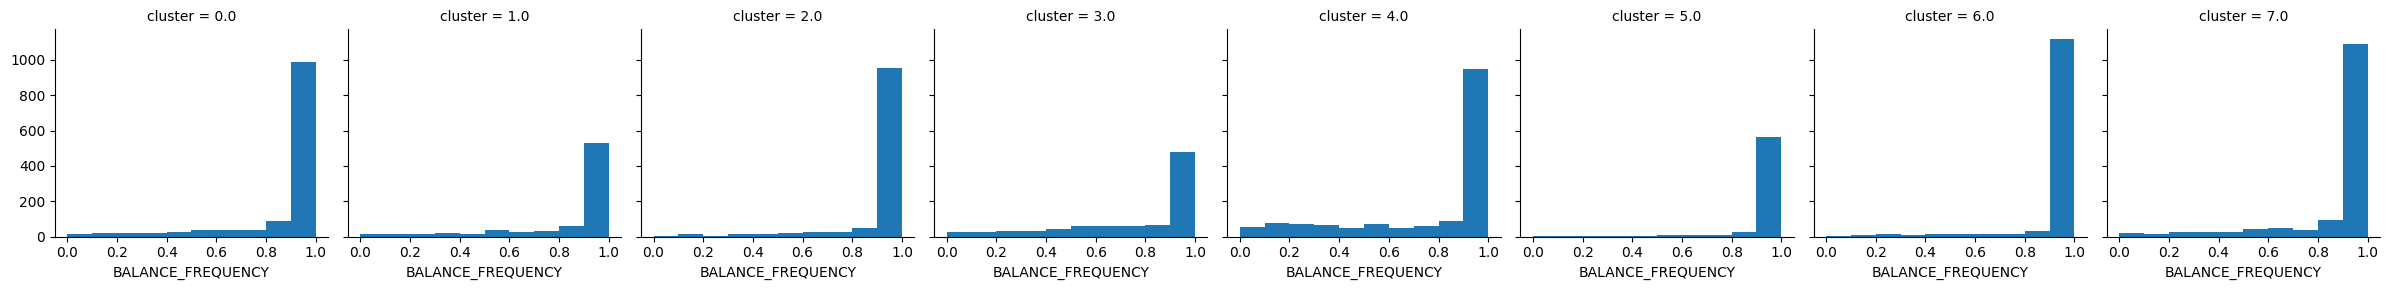

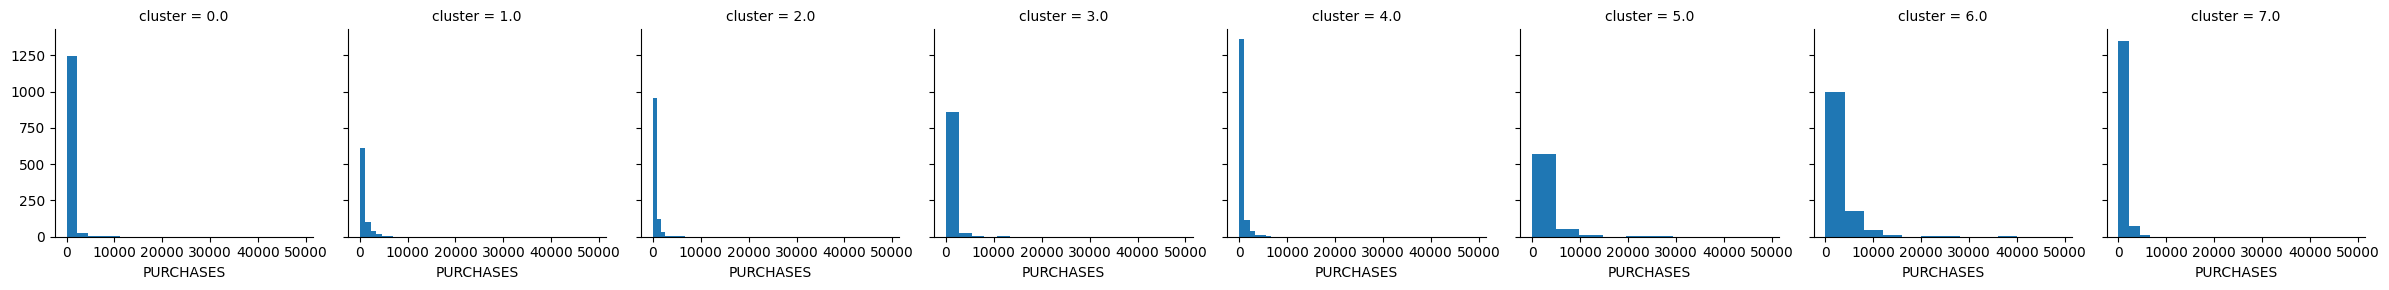

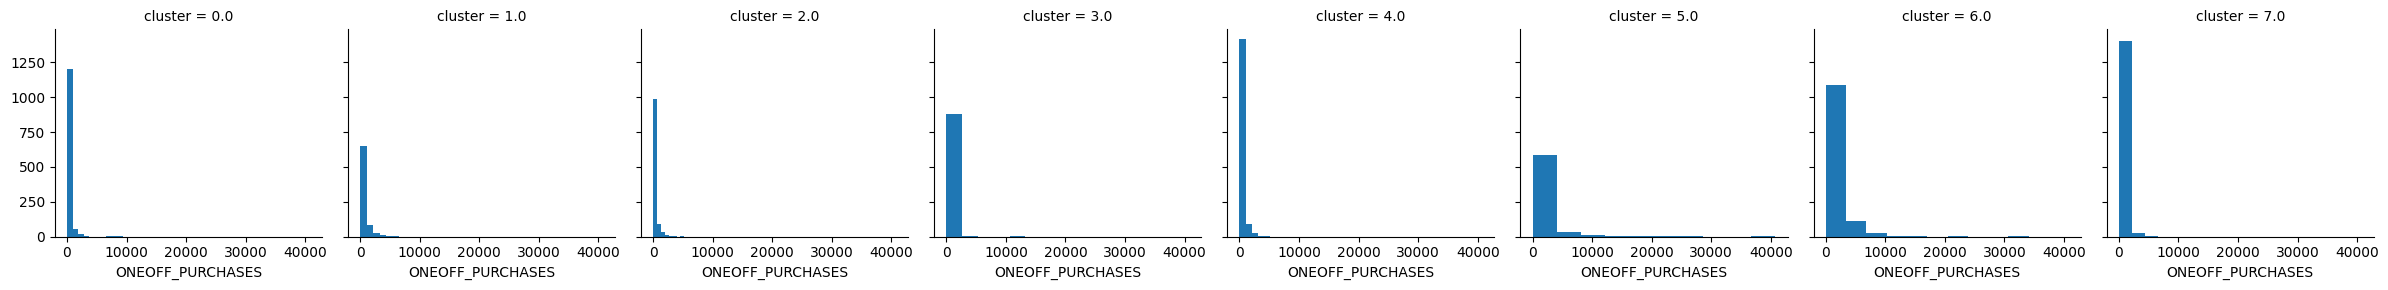

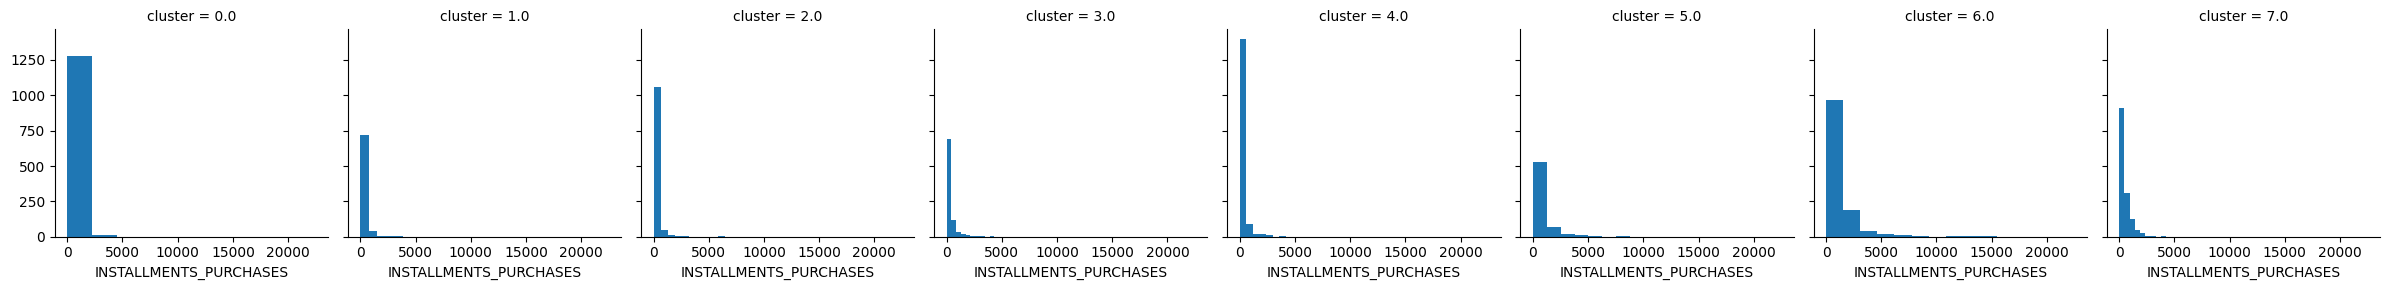

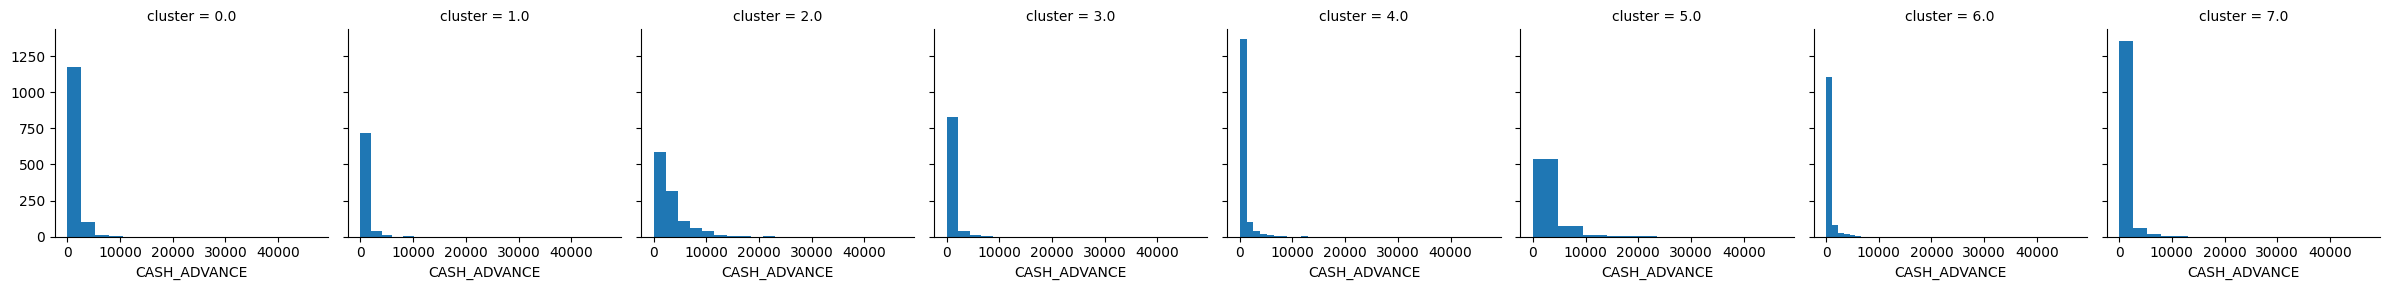

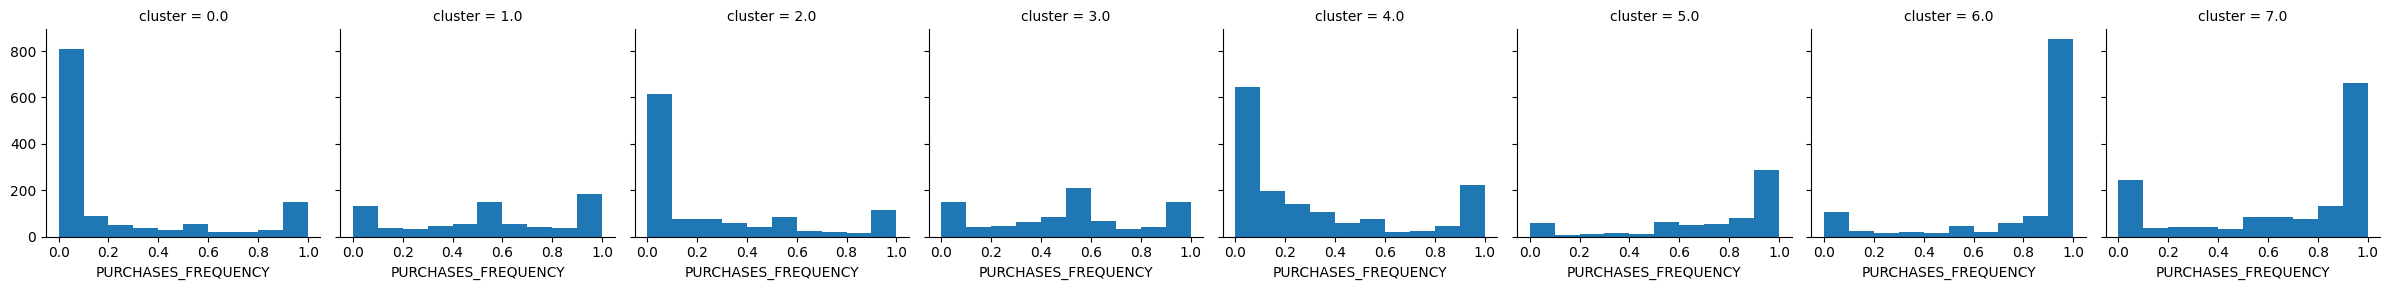

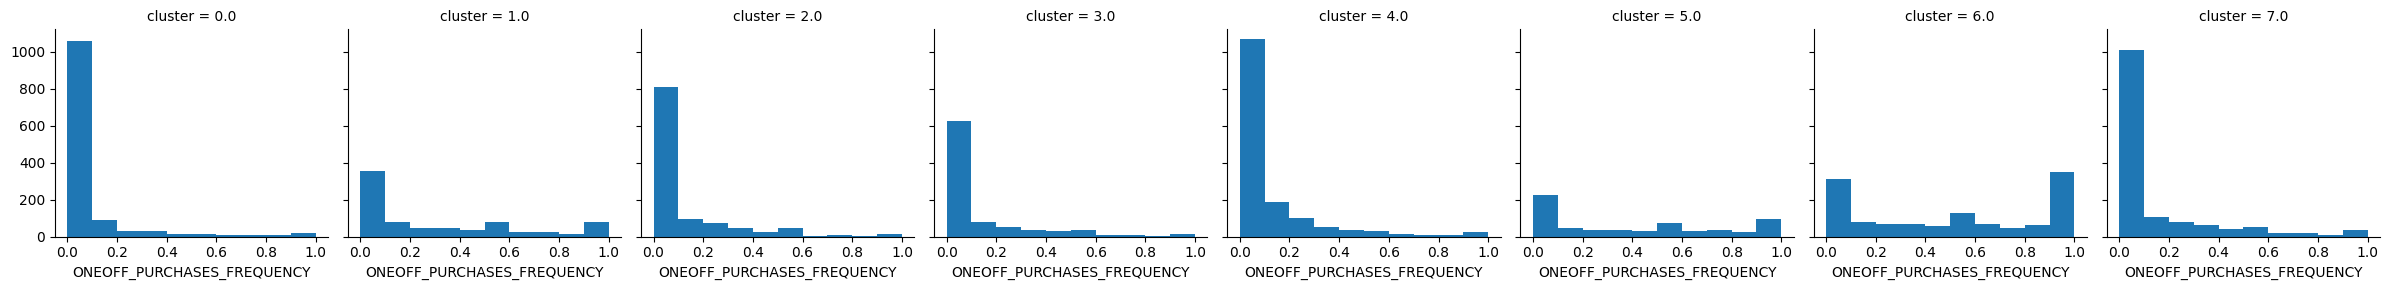

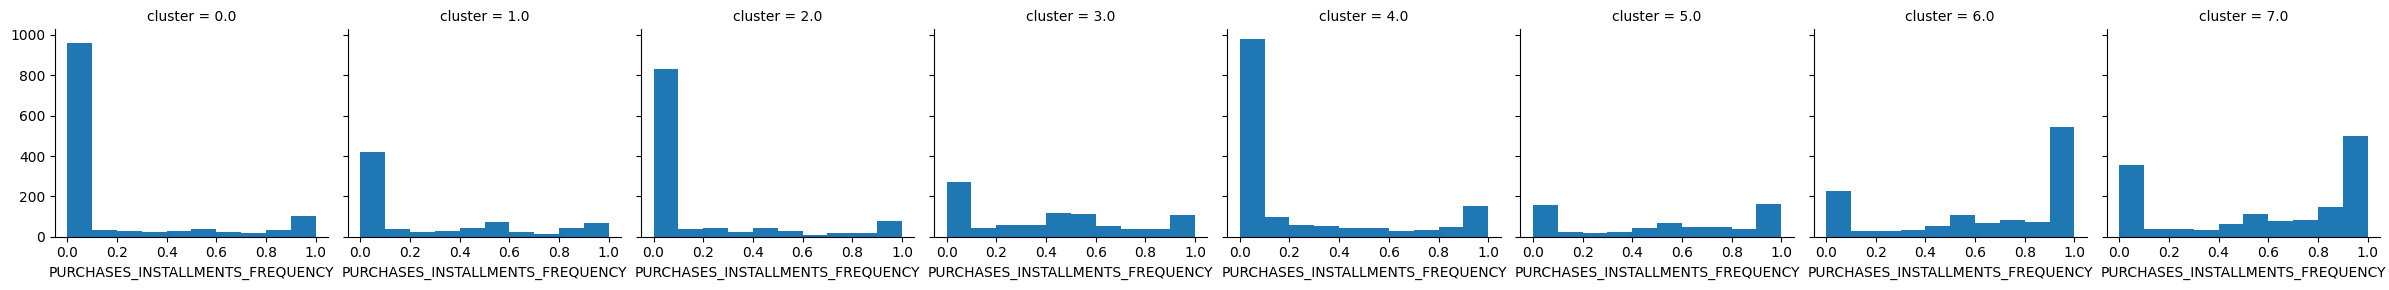

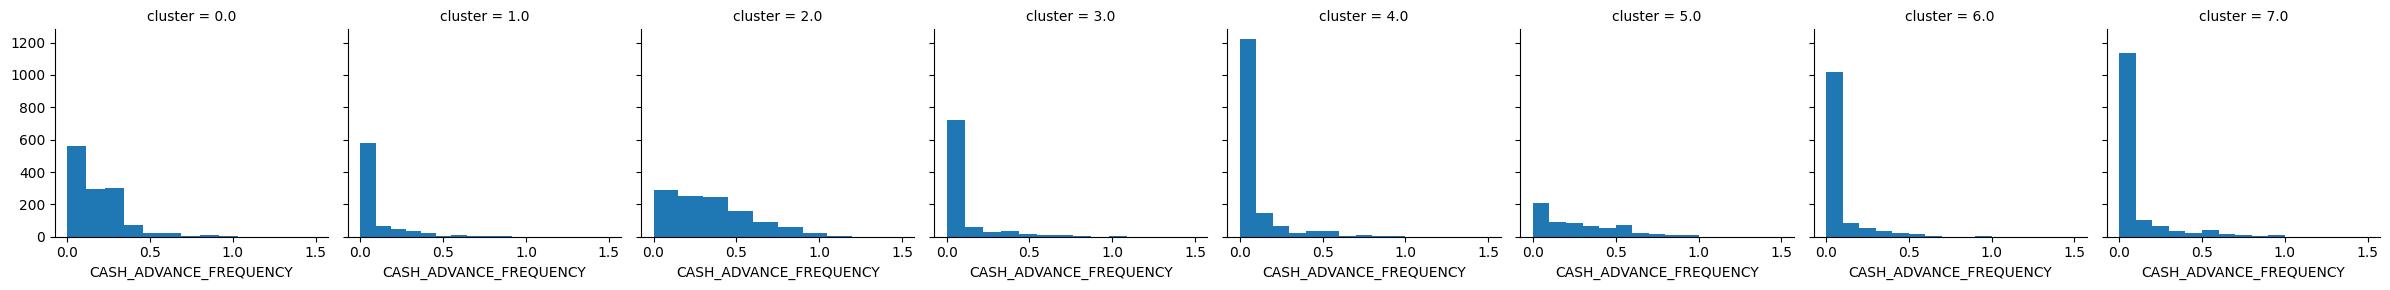

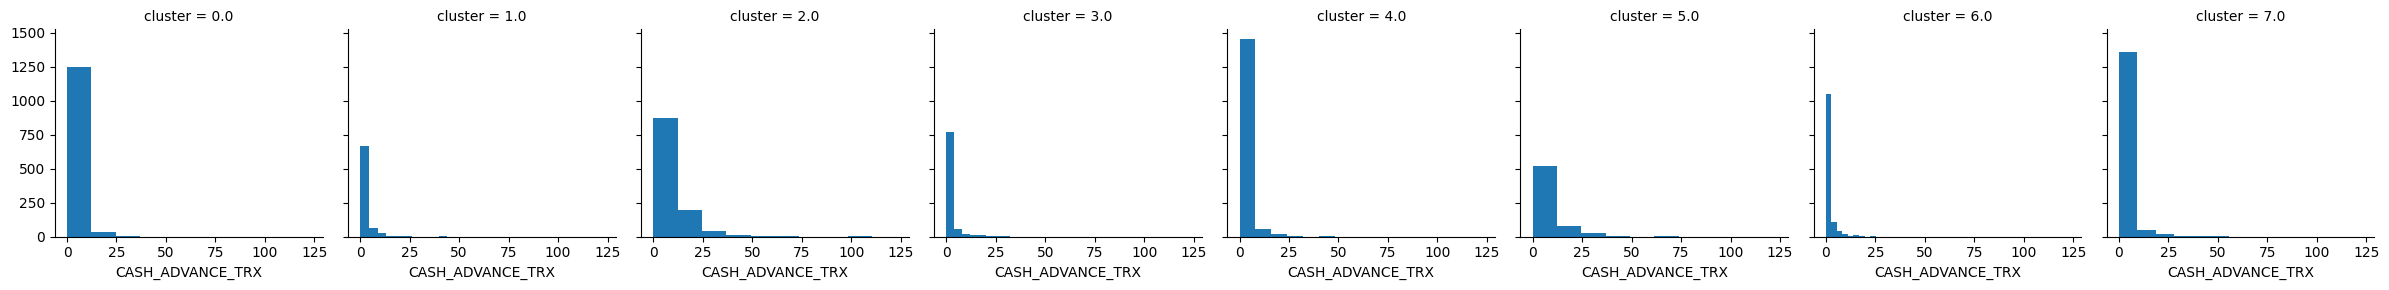

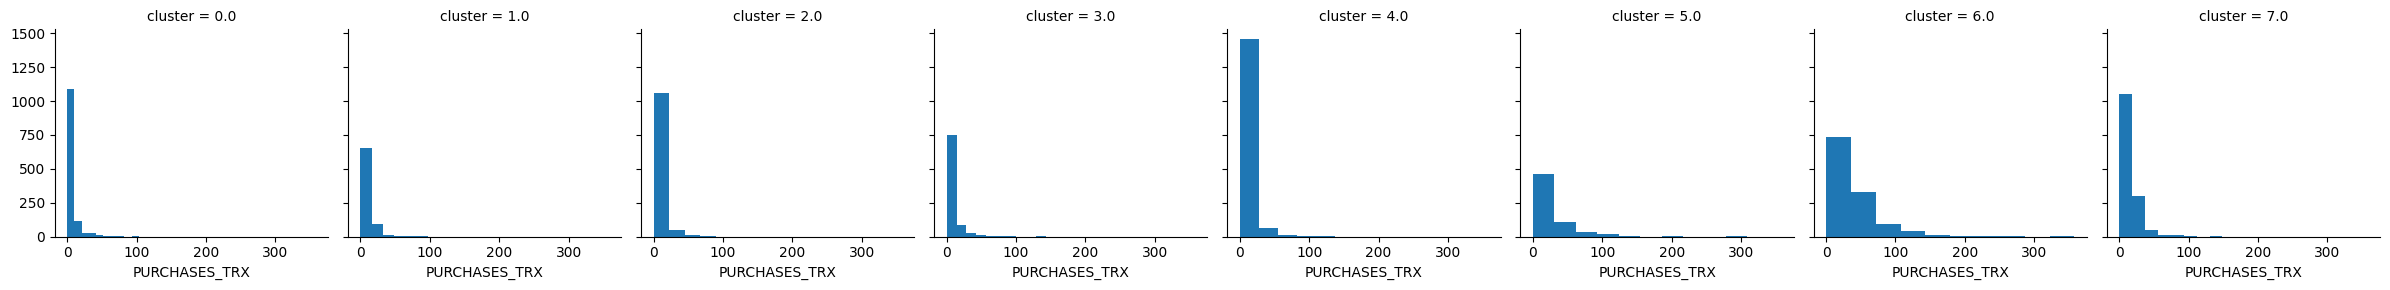

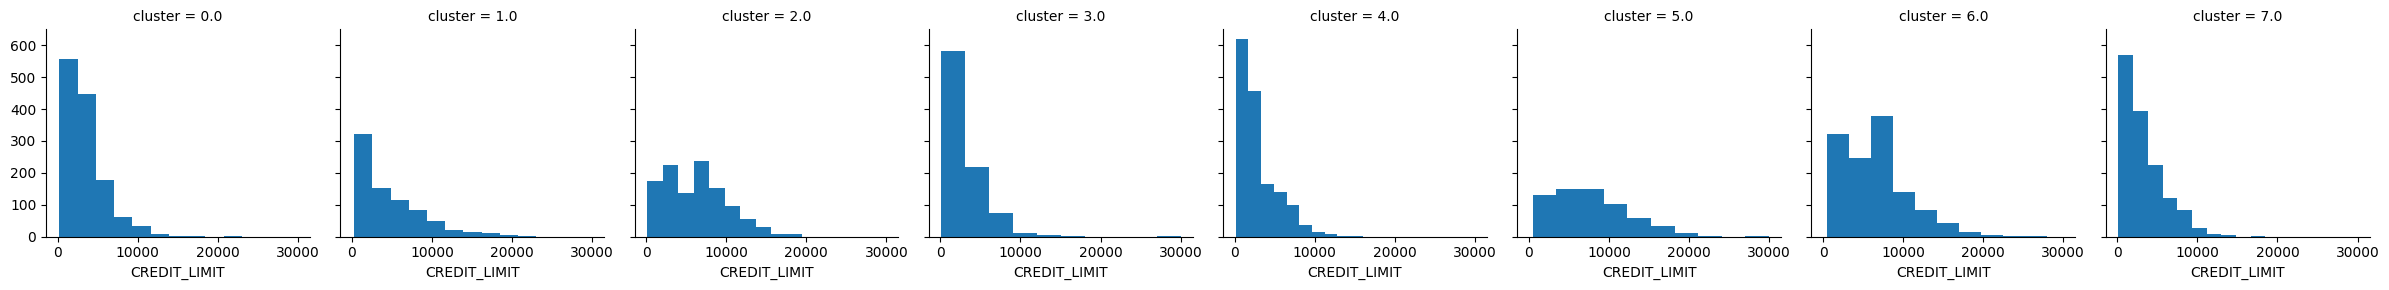

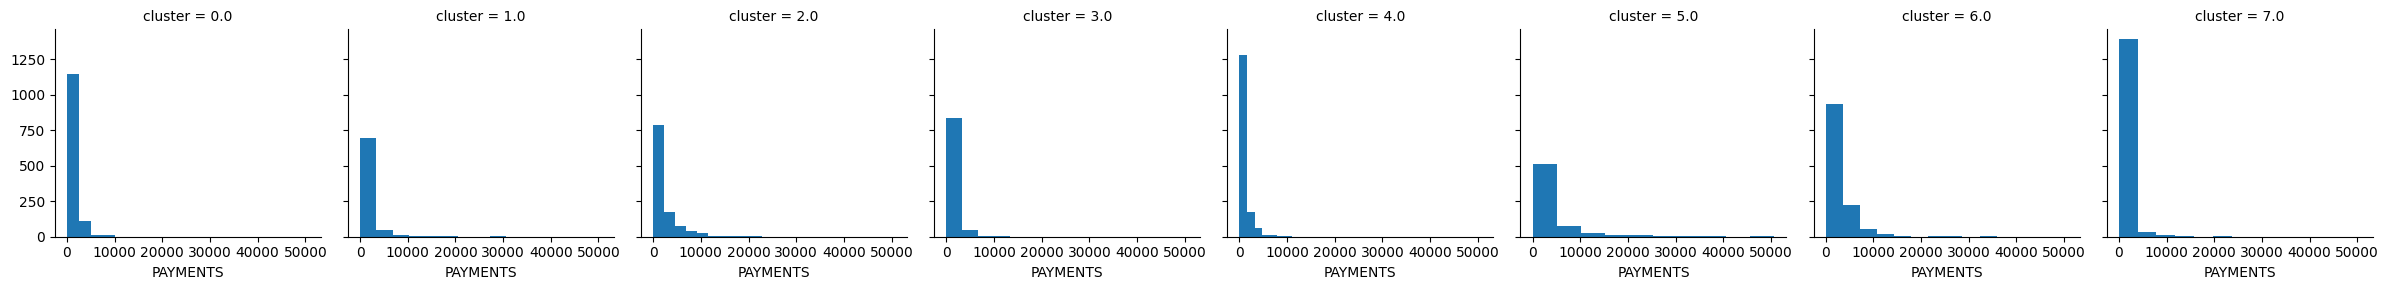

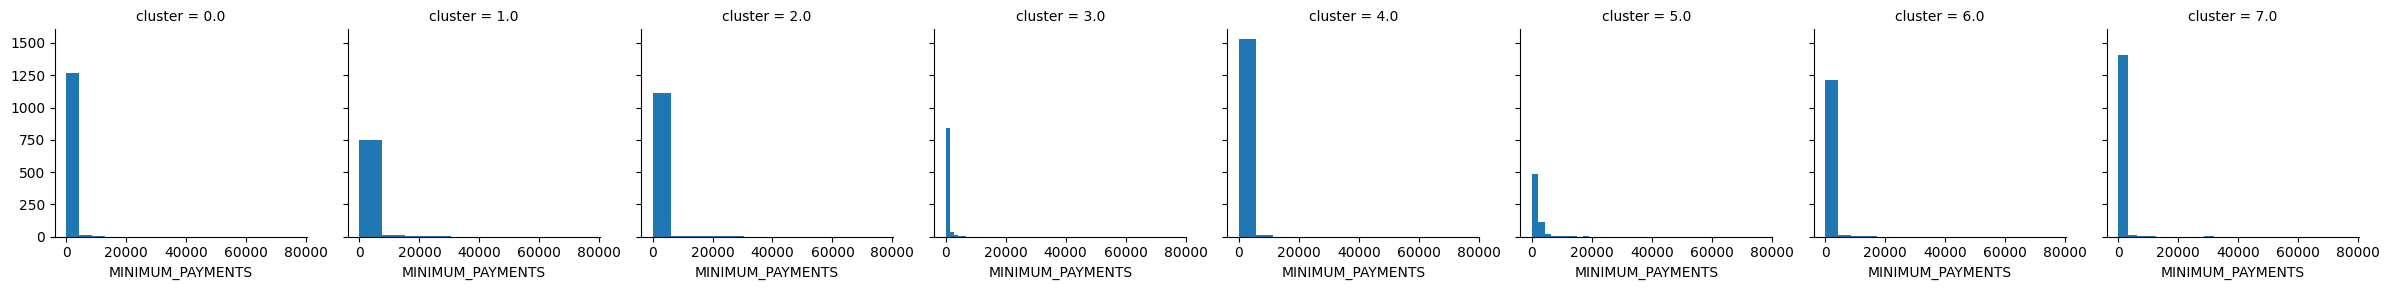

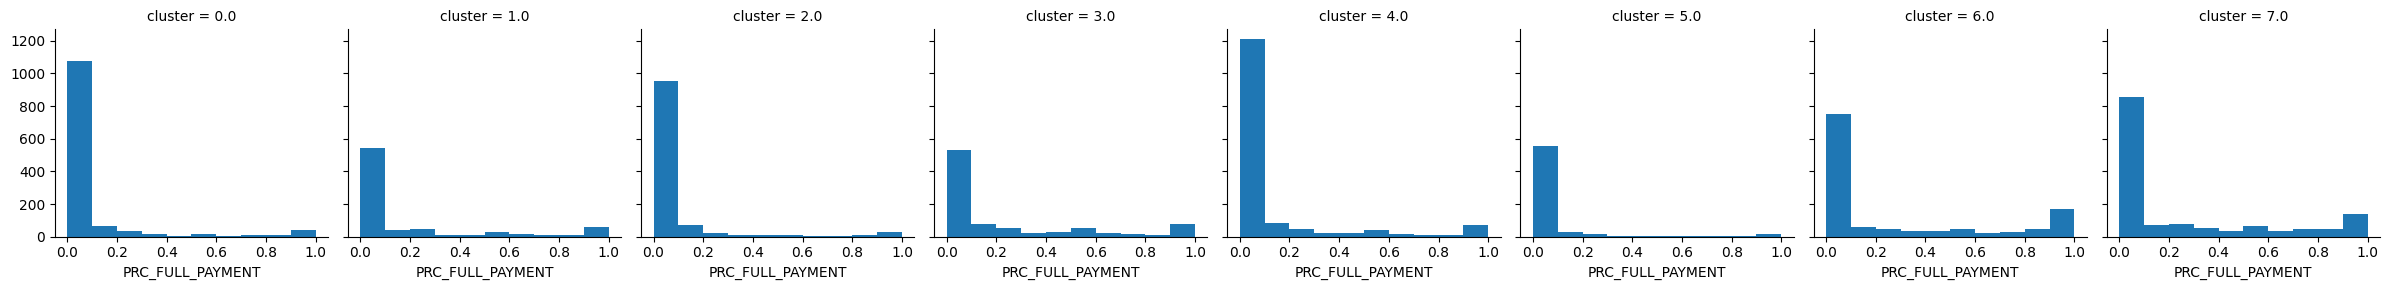

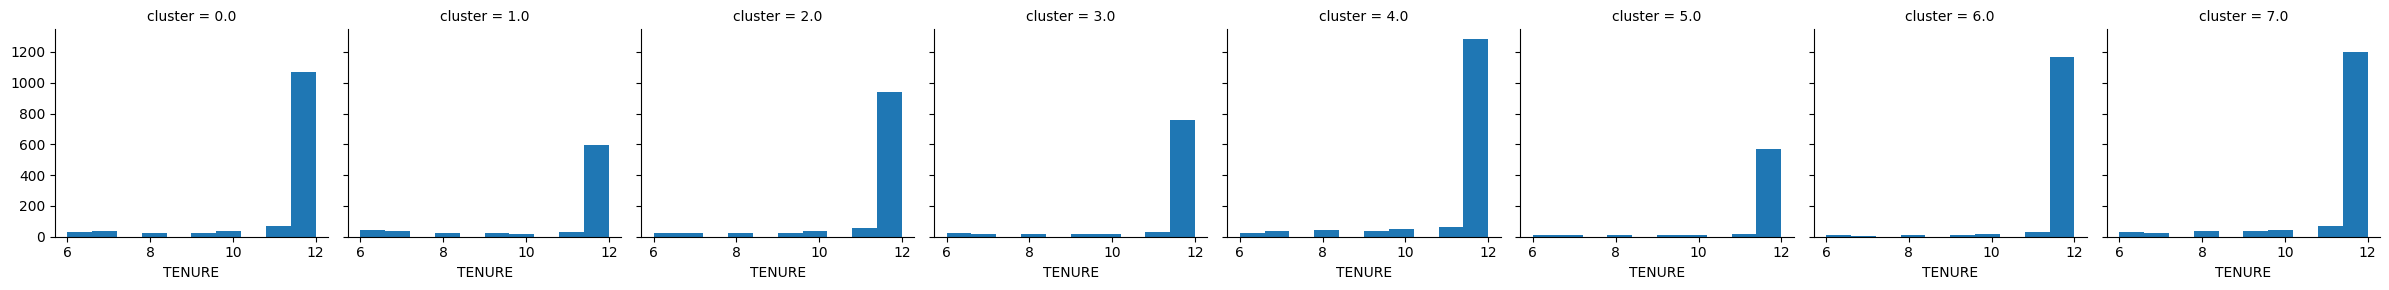

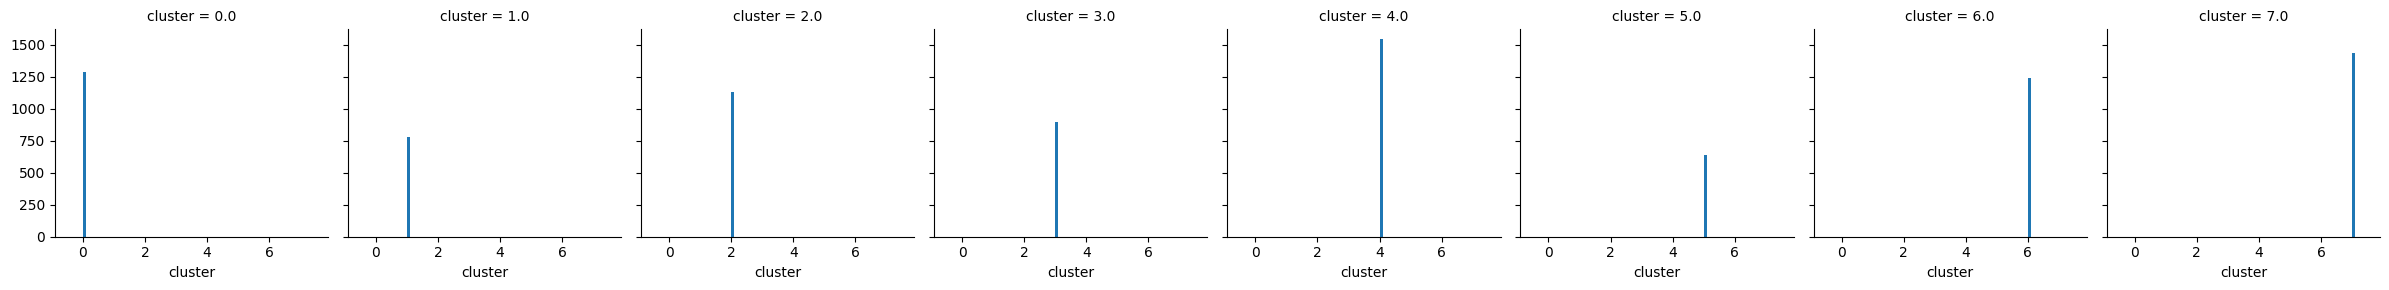

In [194]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)
